In [ ]:
!apt-get install -y swig
!pip install box2d-py

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  swig4.0
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 49 not upgraded.
Need to get 1,116 kB of archives.
After this operation, 5,542 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig4.0 amd64 4.0.2-1ubuntu1 [1,110 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig all 4.0.2-1ubuntu1 [5,632 B]
Fetched 1,116 kB in 0s (2,366 kB/s)
Selecting previously unselected package swig4.0.
(Reading database ... 123622 files and directories currently installed.)
Preparing to unpack .../swig4.0_4.0.2-1ubuntu1_amd64.deb ...
Unpacking swig4.0 (4.0.2-1ubuntu1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_4.0.2-1ubu

In [ ]:
import gym
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from collections import deque
import random
from IPython.display import clear_output
import time

# Crear el entorno
env = gym.make("LunarLander-v2")
num_actions = env.action_space.n
state_shape = env.observation_space.shape

# Parámetros
gamma = 0.99  # Factor de descuento
epsilon = 1.0  # Tasa de exploración inicial
epsilon_min = 0.01
epsilon_decay = 0.995
learning_rate = 0.001
batch_size = 64
memory_size = 100000
episodes = 100

# Memoria de experiencia para el replay buffer
memory = deque(maxlen=memory_size)

# Creación del modelo de red neuronal
def create_q_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(128, activation="relu", input_shape=(state_shape[0],)))
    model.add(layers.Dense(128, activation="relu"))
    model.add(layers.Dense(num_actions, activation="linear"))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
    return model

# Crear modelo de red neuronal
model = create_q_model()

# Modelo objetivo para estabilizar el entrenamiento
target_model = create_q_model()
target_model.set_weights(model.get_weights())

# Función para tomar una acción (explorar o explotar)
def take_action(state, epsilon):
    if np.random.rand() <= epsilon:
        return np.random.choice(num_actions)
    q_values = model.predict(np.expand_dims(state, axis=0), verbose=0)
    return np.argmax(q_values[0])

# Guardar experiencias en la memoria
def store_experience(state, action, reward, next_state, done):
    memory.append((state, action, reward, next_state, done))

# Entrenar el modelo con el replay buffer
def replay():
    if len(memory) < batch_size:
        return
    batch = random.sample(memory, batch_size)
    for state, action, reward, next_state, done in batch:
        target = reward
        if not done:
            target += gamma * np.max(target_model.predict(np.expand_dims(next_state, axis=0), verbose=0)[0])
        q_values = model.predict(np.expand_dims(state, axis=0), verbose=0)
        q_values[0][action] = target
        model.fit(np.expand_dims(state, axis=0), q_values, epochs=1, verbose=0)

# Actualizar pesos del modelo objetivo
def update_target_model():
    target_model.set_weights(model.get_weights())

# Entrenamiento del agente
rewards = []
for episode in range(episodes):
    state = env.reset()
    total_reward = 0
    done = False
    step = 0
    while not done:
        env.render()  # Renderizar cada paso para visualizar
        action = take_action(state, epsilon)
        next_state, reward, done, _ = env.step(action)
        store_experience(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward
        replay()  # Entrenamiento en cada paso
        step += 1
        if done:
            update_target_model()
            break
    rewards.append(total_reward)
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # Mostrar progreso en cada episodio
    clear_output(wait=True)
    print(f'Episode: {episode + 1}/{episodes}, Total Reward: {total_reward}, Epsilon: {epsilon:.4f}')

    # Visualización cada 10 episodios
    if (episode + 1) % 10 == 0:
        plt.plot(rewards)
        plt.xlabel('Episode')
        plt.ylabel('Total Reward')
        plt.show()

env.close()


Episode: 1/100, Total Reward: -119.33929372525516, Epsilon: 0.9950
Episode: 2/100, Total Reward: -228.13835925846578, Epsilon: 0.9900
Episode: 3/100, Total Reward: -121.70159990455187, Epsilon: 0.9851
Episode: 4/100, Total Reward: -247.38541868421845, Epsilon: 0.9801
Episode: 5/100, Total Reward: -189.4060416643187, Epsilon: 0.9752
Episode: 6/100, Total Reward: -191.61079851244983, Epsilon: 0.9704
Episode: 7/100, Total Reward: -51.903828801541366, Epsilon: 0.9655
Episode: 8/100, Total Reward: -209.0406757129513, Epsilon: 0.9607
Episode: 9/100, Total Reward: -179.2151895048245, Epsilon: 0.9559
Episode: 10/100, Total Reward: -282.2178078241522, Epsilon: 0.9511
Episode: 11/100, Total Reward: -307.8196635286189, Epsilon: 0.9464
Episode: 12/100, Total Reward: -128.62366141488621, Epsilon: 0.9416
Episode: 13/100, Total Reward: -57.79851934627403, Epsilon: 0.9369
Episode: 14/100, Total Reward: -95.47225772586799, Epsilon: 0.9322
Episode: 15/100, Total Reward: -187.66957007627798, Epsilon: 0.9

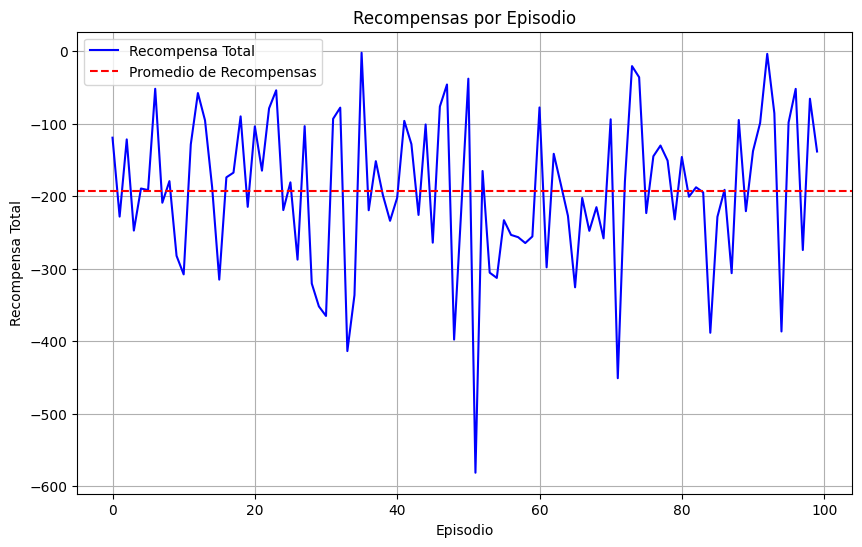

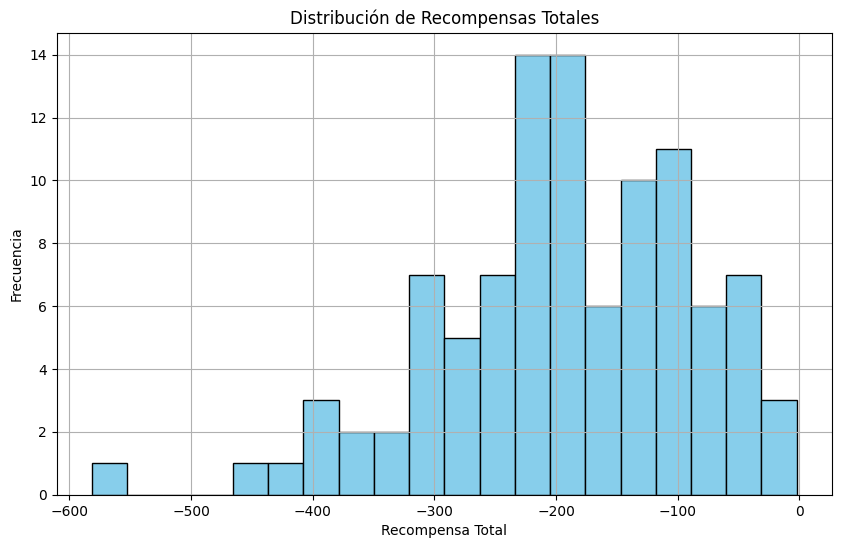

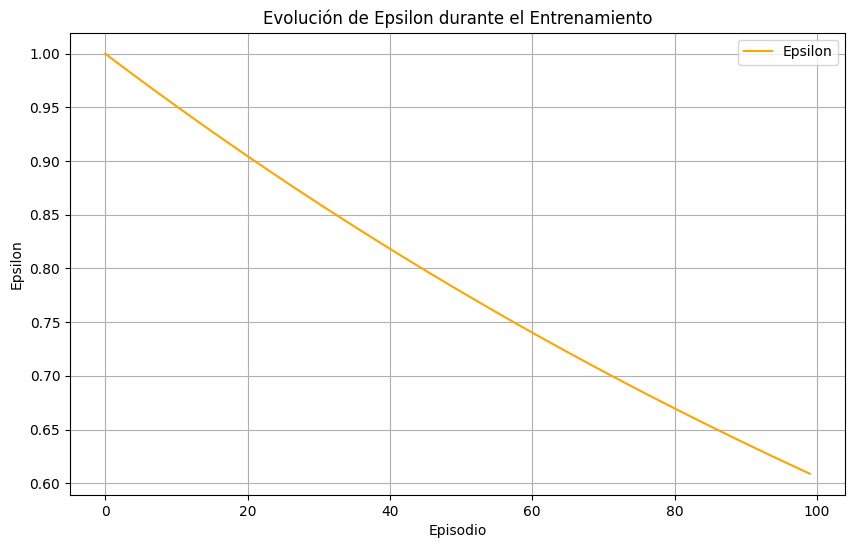

Recompensa promedio: -192.79
Mejor recompensa: -2.20
Peor recompensa: -581.26


In [ ]:
import gym
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from collections import deque
import random

# Crear el entorno
env = gym.make("LunarLander-v2")
num_actions = env.action_space.n
state_shape = env.observation_space.shape

# Parámetros
gamma = 0.99  # Factor de descuento
epsilon = 1.0  # Tasa de exploración inicial
epsilon_min = 0.01
epsilon_decay = 0.995
learning_rate = 0.005  # Tasa de aprendizaje ajustada
batch_size = 64
memory_size = 200000
episodes = 100  # Reducido para pruebas rápidas

# Memoria de experiencia para el replay buffer
memory = deque(maxlen=memory_size)

# Creación del modelo de red neuronal
def create_q_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(64, activation="relu", input_shape=(state_shape[0],)))  # Menos neuronas
    model.add(layers.Dense(num_actions, activation="linear"))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
    return model

# Crear modelo de red neuronal
model = create_q_model()

# Modelo objetivo para estabilizar el entrenamiento
target_model = create_q_model()
target_model.set_weights(model.get_weights())

# Función para tomar una acción (explorar o explotar)
def take_action(state, epsilon):
    if np.random.rand() <= epsilon:
        return np.random.choice(num_actions)
    q_values = model.predict(np.expand_dims(state, axis=0), verbose=0)
    return np.argmax(q_values[0])

# Guardar experiencias en la memoria
def store_experience(state, action, reward, next_state, done):
    memory.append((state, action, reward, next_state, done))

# Entrenar el modelo con el replay buffer
def replay():
    if len(memory) < batch_size:
        return
    batch = random.sample(memory, batch_size)
    for state, action, reward, next_state, done in batch:
        target = reward
        if not done:
            target += gamma * np.max(target_model.predict(np.expand_dims(next_state, axis=0), verbose=0)[0])
        q_values = model.predict(np.expand_dims(state, axis=0), verbose=0)
        q_values[0][action] = target
        model.fit(np.expand_dims(state, axis=0), q_values, epochs=1, verbose=0)

# Actualizar pesos del modelo objetivo
def update_target_model():
    target_model.set_weights(model.get_weights())

# Entrenamiento del agente
rewards = []
epsilons = []
for episode in range(episodes):
    state = env.reset()
    total_reward = 0
    done = False
    while not done:
        # Descomentar para renderizar (opcional)
        # env.render()
        action = take_action(state, epsilon)
        next_state, reward, done, _ = env.step(action)
        store_experience(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

    # Entrenar una vez al final del episodio
    replay()
    update_target_model()

    rewards.append(total_reward)
    epsilons.append(epsilon)
    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    print(f'Episode: {episode + 1}/{episodes}, Total Reward: {total_reward}, Epsilon: {epsilon:.4f}')

# Graficar las recompensas
plt.figure(figsize=(10, 6))
plt.plot(rewards, label='Recompensa Total', color='blue')
plt.xlabel('Episodio')
plt.ylabel('Recompensa Total')
plt.title('Recompensas por Episodio')
plt.axhline(y=np.mean(rewards), color='red', linestyle='--', label='Promedio de Recompensas')
plt.legend()
plt.grid()
plt.show()

# Histograma de recompensas
plt.figure(figsize=(10, 6))
plt.hist(rewards, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Recompensa Total')
plt.ylabel('Frecuencia')
plt.title('Distribución de Recompensas Totales')
plt.grid()
plt.show()

# Graficar la evolución de epsilon
plt.figure(figsize=(10, 6))
plt.plot(epsilons, label='Epsilon', color='orange')
plt.xlabel('Episodio')
plt.ylabel('Epsilon')
plt.title('Evolución de Epsilon durante el Entrenamiento')
plt.legend()
plt.grid()
plt.show()

# Resumen estadístico
print(f'Recompensa promedio: {np.mean(rewards):.2f}')
print(f'Mejor recompensa: {np.max(rewards):.2f}')
print(f'Peor recompensa: {np.min(rewards):.2f}')

env.close()
